In [1]:
import os
import fnmatch
import numpy as np
from matplotlib import pyplot as plt
import data

In [2]:
data.load_dexnet()

In [5]:
data_f = "dataset/3dnet_kit_06_13_17"
%matplotlib inline

# Dataset Download

In [8]:
if not os.path.exists(data_f):
    !wget -v -L -O dexnet_2.tar.gz "https://app.box.com/index.php?rm=box_download_shared_file&shared_name=6mnb2bzi5zfa7qpwyn7uq5atb7vbztng&file_id=f_226328650746"
    !tar -xzf dexnet_2.tar.gz
    !rm dexnet_2.tar.gz

# Available Files

In [9]:
first_set = fnmatch.filter(os.listdir(data_f), '*00000.npz')
for el in first_set:
    print(el)

robust_ferrari_canny_00000.npz
binary_ims_tf_00000.npz
object_labels_00000.npz
hand_poses_00000.npz
pose_labels_00000.npz
force_closure_00000.npz
depth_ims_tf_table_00000.npz
depth_ims_tf_00000.npz
binary_ims_raw_00000.npz
depth_ims_raw_00000.npz
depth_ims_raw_table_00000.npz
table_mask_00000.npz
image_labels_00000.npz


## Visualization options

In [15]:
n_datapoints = 10
file_nr = 1
file_nr_str = f'{file_nr:05d}'

In [16]:
def display_images(data, length = n_datapoints):
    fig, axes = plt.subplots(length,length, figsize=(15,15))
    for i,ax in enumerate(axes.flat):
        ax.imshow(data[i,...], interpolation='nearest')
        
def display_data(data, length = n_datapoints):
    for i in range(0,length):
        print(data[i*length:(i+1)*length])
        
def load_file(name, nr = file_nr):
    nr_str = f'{nr:05d}'
    return np.load(data_f + "/" + name + nr_str + '.npz')['arr_0']

# Images

## Depth Images Table

1000
32
Number of files with depth images: 6729


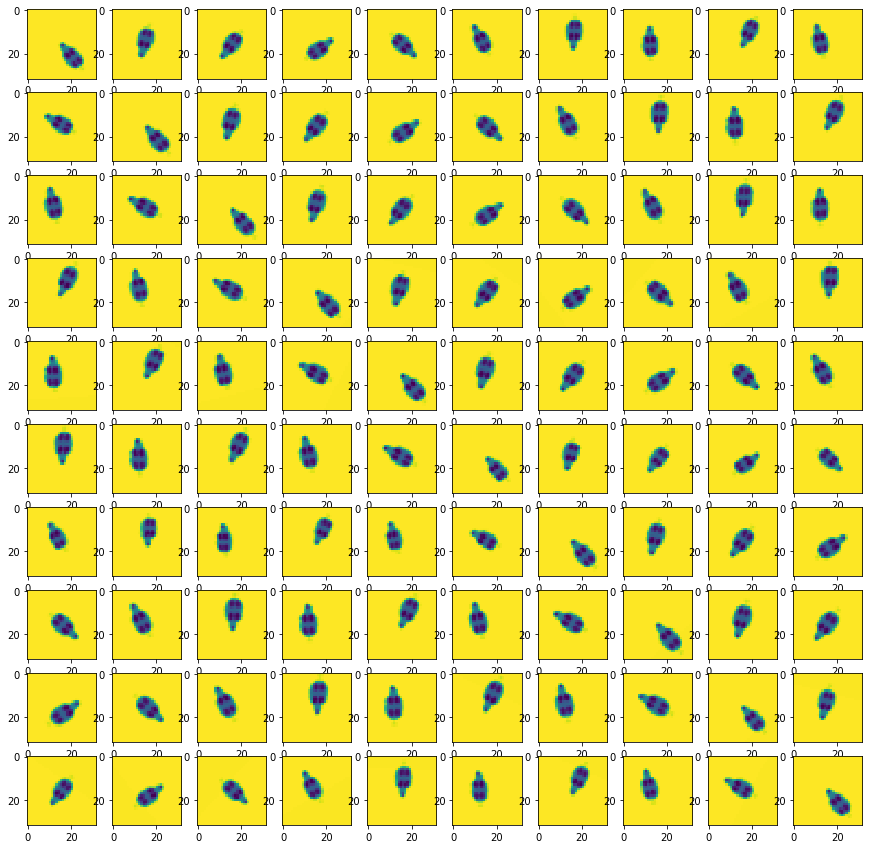

In [146]:
depth_im_t_f = load_file('depth_ims_tf_table_')
print(len(depth_im_t_f))
depth_im_t = depth_im_t_f[0,...]
print(len(depth_im_t))
display_images(depth_im_t_f)
depth_im_f_l = fnmatch.filter(os.listdir(data_f), 'depth_ims_tf_table_*')
print("Number of files with depth images: " + str(len(depth_im_f_l)))

## Binary Images

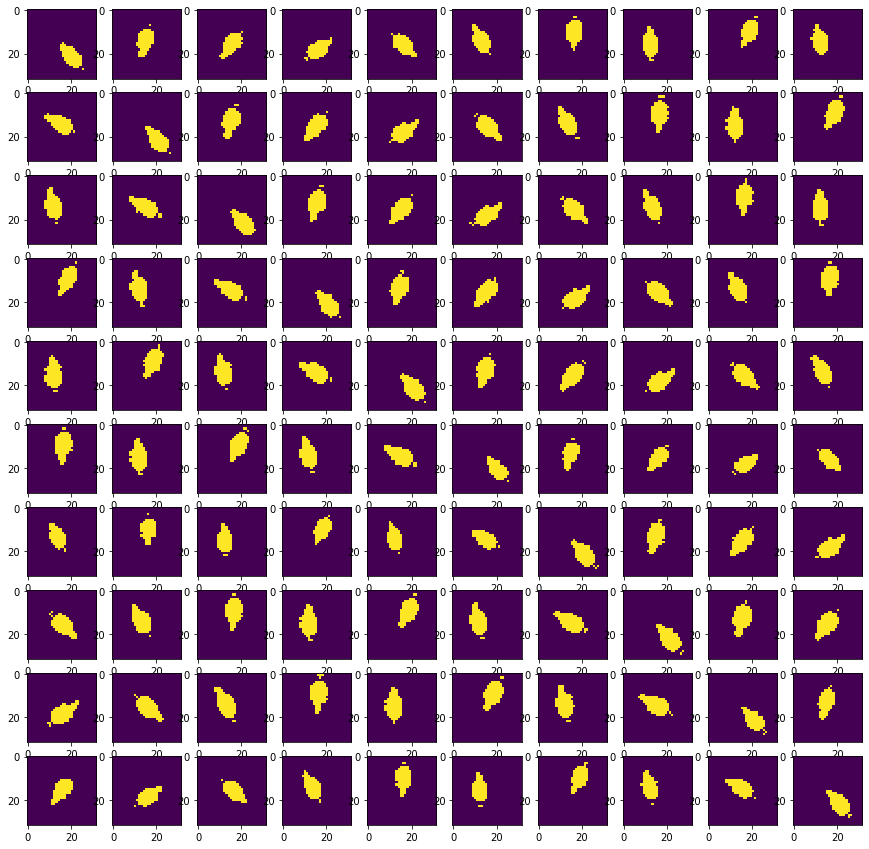

In [147]:
binary_ims_tf = load_file('binary_ims_tf_')
display_images(binary_ims_tf)

## Depth Images

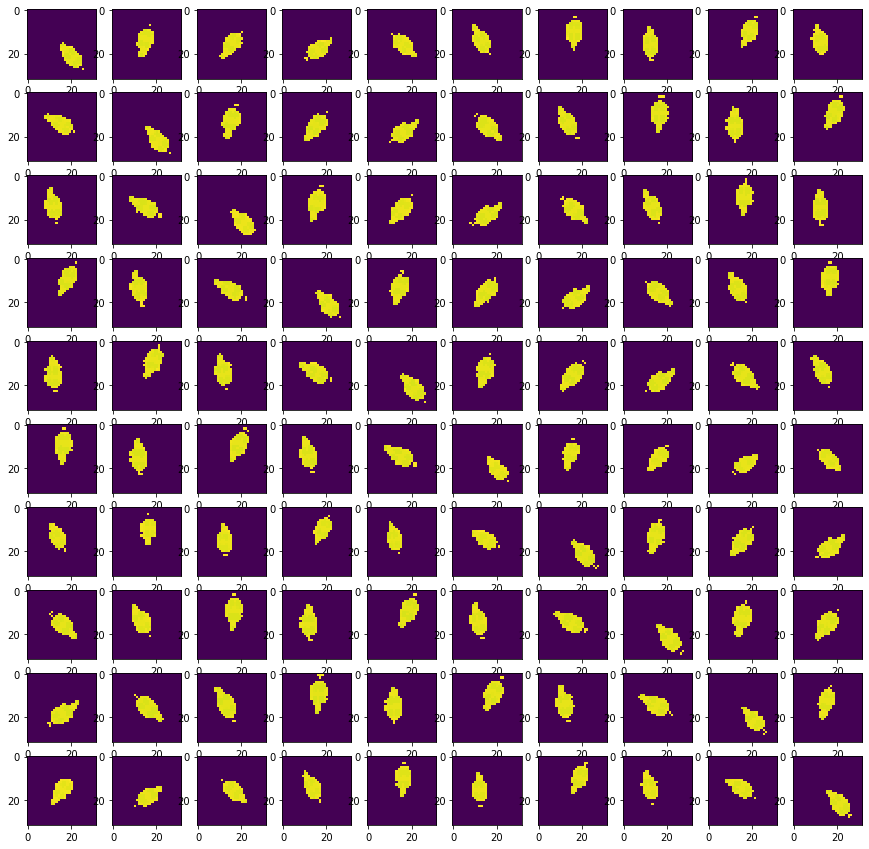

In [154]:
depth_im_f = load_file('depth_ims_tf_')
display_images(depth_im_f)

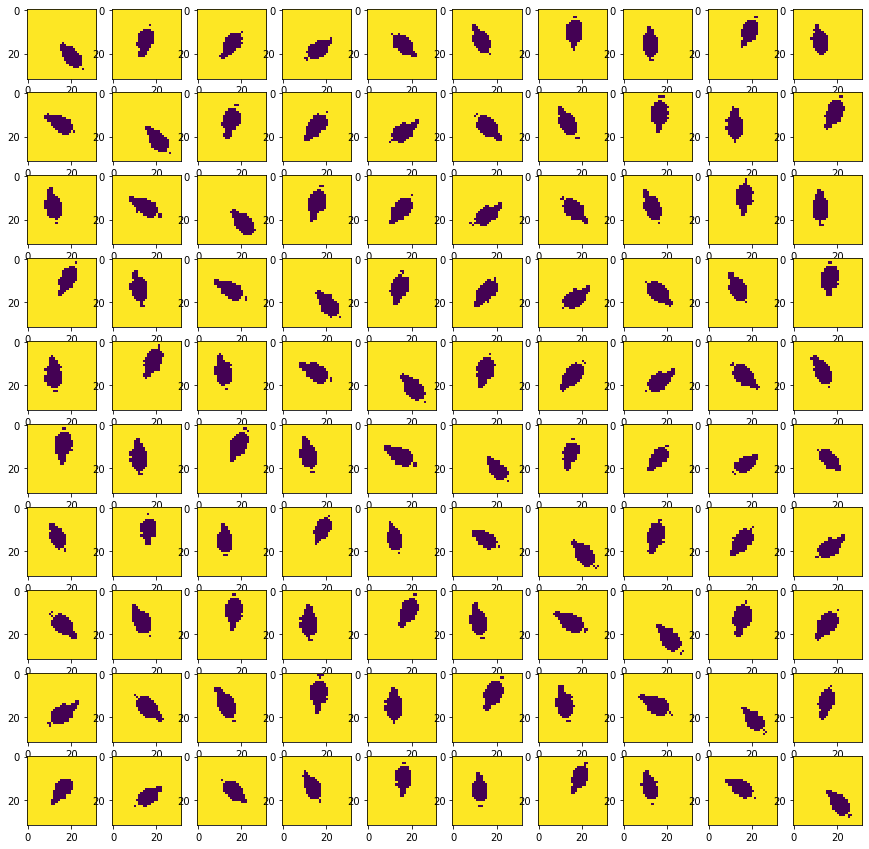

In [151]:
table_mask = load_file("table_mask_")
display_images(table_mask)

# Object Labels

In [152]:
object_l_f = np.load(data_f + '/object_labels_' + file_nr_str + '.npz')['arr_0']
display_data(object_l_f)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Metrics

## Robust Ferrari Canny

In [104]:
rfc_f = np.load(data_f + '/robust_ferrari_canny_' + file_nr_str + '.npz')['arr_0']
display_data(rfc_f)

[0.         0.00071162 0.         0.         0.         0.
 0.         0.         0.         0.0036971 ]
[0.         0.         0.00071162 0.         0.         0.
 0.         0.         0.         0.        ]
[0.0036971  0.         0.         0.00071162 0.         0.
 0.         0.         0.         0.        ]
[0.         0.0036971  0.         0.         0.00071162 0.
 0.         0.         0.         0.        ]
[0.         0.         0.0036971  0.         0.         0.00071162
 0.         0.         0.         0.        ]
[0.         0.         0.         0.0036971  0.         0.
 0.00071162 0.         0.         0.        ]
[0.         0.         0.         0.         0.0036971  0.
 0.         0.00071162 0.         0.        ]
[0.         0.         0.         0.         0.         0.0036971
 0.         0.         0.00071162 0.        ]
[0.         0.         0.         0.         0.         0.
 0.0036971  0.         0.         0.00071162]
[0.        0.        0.        0.       

# Raw images

Number of files with raw images: 13458
Images per file: 1000


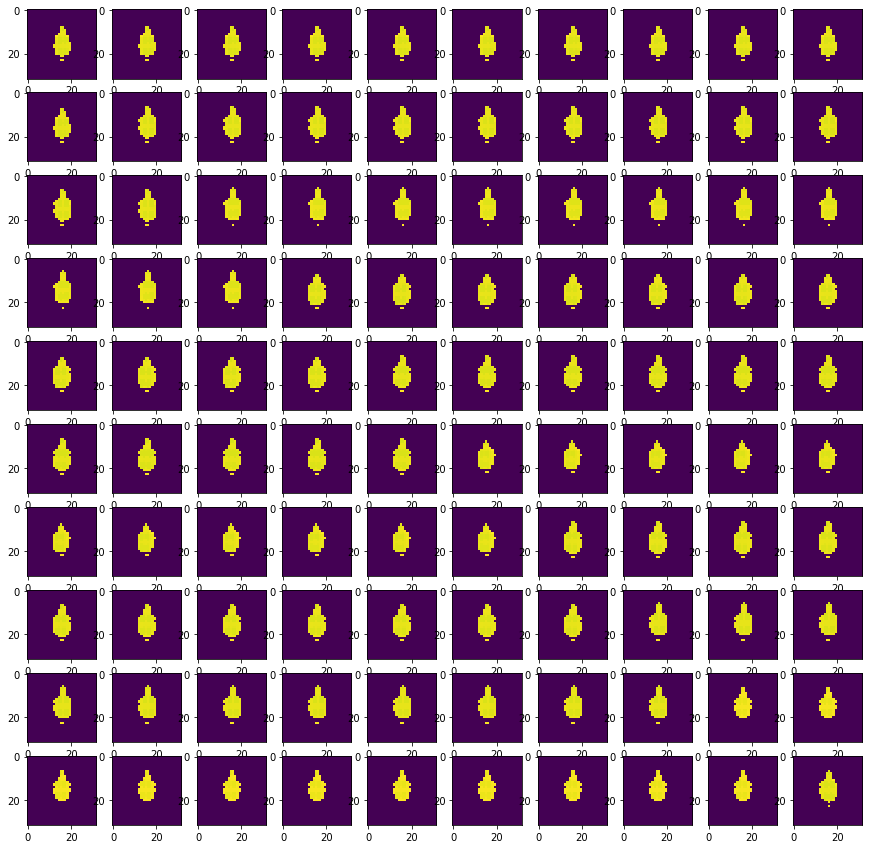

In [149]:
depth_ims_raw = load_file("depth_ims_raw_")
display_images(depth_ims_raw)
raw_imgs_f_l = fnmatch.filter(os.listdir(data_f), 'depth_ims_raw_*')
print("Number of files with raw images: " + str(len(raw_imgs_f_l)))
print("Images per file: " + str(len(depth_ims_raw)))

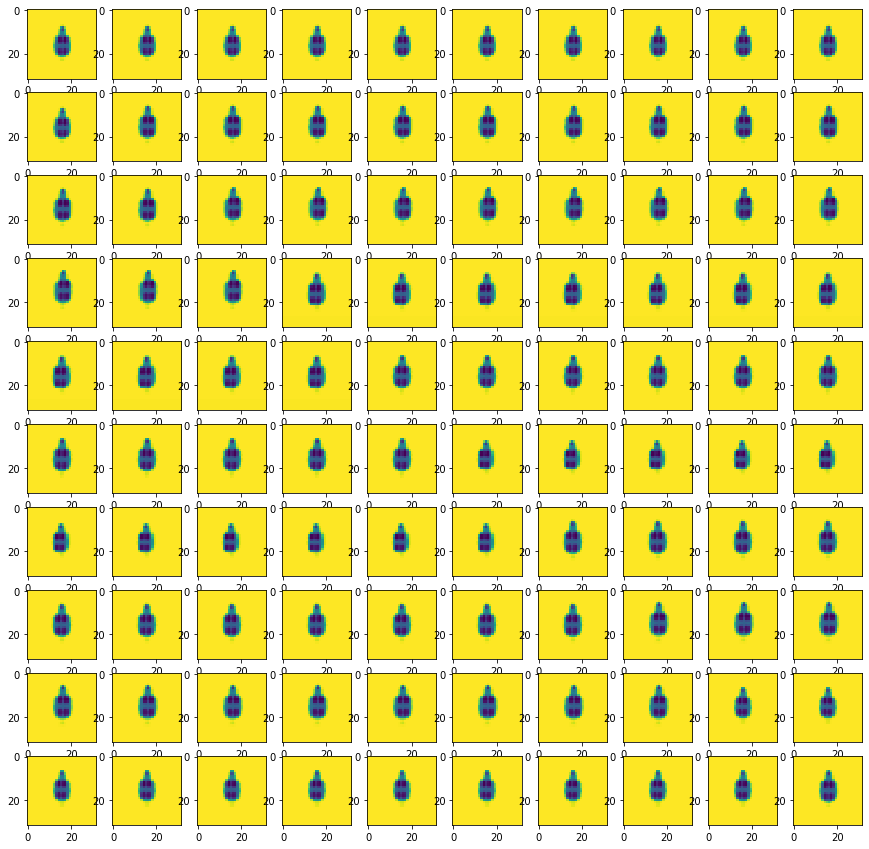

In [150]:
depth_ims_raw_table = load_file("depth_ims_raw_table_")
display_images(depth_ims_raw_table)

# Image Labels

In [153]:
img_l_f = np.load(data_f + '/image_labels_' + file_nr_str + '.npz')['arr_0']
display_data(img_l_f)

[100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]
[100. 101. 101. 101. 101. 101. 101. 101. 101. 101.]
[101. 101. 102. 102. 102. 102. 102. 102. 102. 102.]
[102. 102. 102. 103. 103. 103. 103. 103. 103. 103.]
[103. 103. 103. 103. 104. 104. 104. 104. 104. 104.]
[104. 104. 104. 104. 104. 105. 105. 105. 105. 105.]
[105. 105. 105. 105. 105. 105. 106. 106. 106. 106.]
[106. 106. 106. 106. 106. 106. 106. 107. 107. 107.]
[107. 107. 107. 107. 107. 107. 107. 107. 108. 108.]
[108. 108. 108. 108. 108. 108. 108. 108. 108. 109.]


## Fetch objects by label

In [131]:
def fetch_files(num):
    print("Loading file 1 of", num)
    depth_im_t_f = load_file('depth_ims_tf_table_')
    object_labels = load_file('object_labels_')
    metric = load_file('robust_ferrari_canny_')
    for i in range(1,num):
        if i % 10 == 0:
            print("Loading file",i+1, "of", num)
        depth_im_t_f = np.append(depth_im_t_f,load_file('depth_ims_tf_table_', i), axis=0)
        object_labels = np.append(object_labels,load_file('object_labels_', i), axis=0)
        metric = np.append(metric,load_file('robust_ferrari_canny_', i), axis=0)
    return (depth_im_t_f, object_labels, metric)
    
def get_class_indices(object_labels, num):
    return np.where(object_labels==num)

def get_num_classes(object_labels):
    return int(object_labels[-1])

In [162]:
data = fetch_files(150)
print("Number of complete classes", get_num_classes(data[1]))

Loading file 1 of 150
Loading file 11 of 150
Loading file 21 of 150
Loading file 31 of 150
Loading file 41 of 150
Loading file 51 of 150
Loading file 61 of 150
Loading file 71 of 150
Loading file 81 of 150
Loading file 91 of 150
Loading file 101 of 150
Loading file 111 of 150
Loading file 121 of 150
Loading file 131 of 150
Loading file 141 of 150
Number of complete classes 32


In [163]:
#num_elephant = np.count_nonzero(files[1] == 0)
for i in range(get_num_classes(data[1])):
    print("Number of samples in class", i, ":", len(get_class_indices(data[1], i)[0]))

Number of samples in class 0 : 4600
Number of samples in class 1 : 3550
Number of samples in class 2 : 8400
Number of samples in class 3 : 7000
Number of samples in class 4 : 8450
Number of samples in class 5 : 8100
Number of samples in class 6 : 5750
Number of samples in class 7 : 9450
Number of samples in class 8 : 4350
Number of samples in class 9 : 11750
Number of samples in class 10 : 3150
Number of samples in class 11 : 1500
Number of samples in class 12 : 2500
Number of samples in class 13 : 4650
Number of samples in class 14 : 2300
Number of samples in class 15 : 0
Number of samples in class 16 : 950
Number of samples in class 17 : 4500
Number of samples in class 18 : 500
Number of samples in class 19 : 350
Number of samples in class 20 : 7100
Number of samples in class 21 : 9750
Number of samples in class 22 : 1650
Number of samples in class 23 : 3550
Number of samples in class 24 : 4750
Number of samples in class 25 : 700
Number of samples in class 26 : 2550
Number of samples

Skipping class  15  because it has less than 100 samples:  0


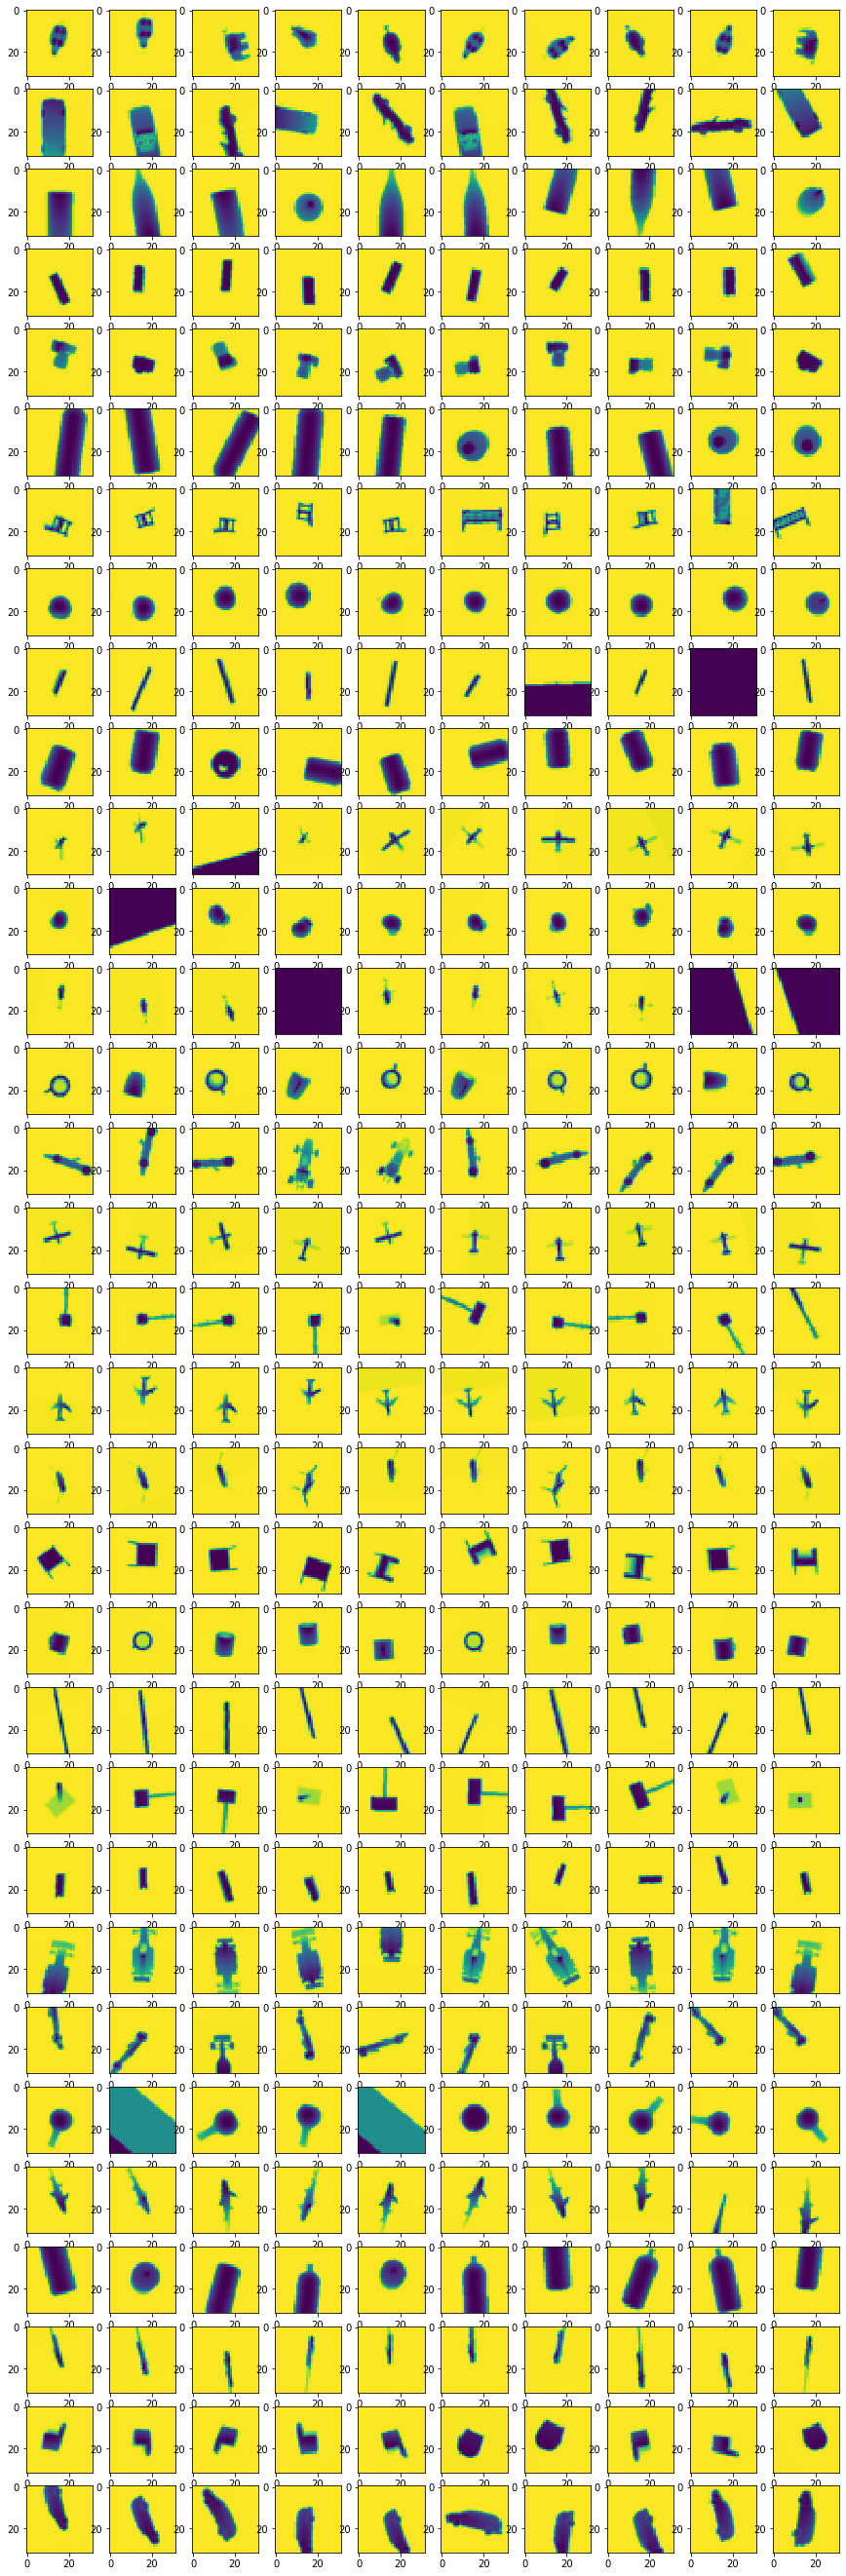

In [164]:
fig, axes = plt.subplots(get_num_classes(data[1]),n_datapoints, figsize=(15, 1.5*get_num_classes(data[1])))
rng = np.random.default_rng(12345)
offset = 0
for i,ax in enumerate(axes.flat):
    o_class = int(np.floor(i / n_datapoints))
    o_class = o_class + offset
    class_idxs = get_class_indices(data[1], o_class)
    if (len(class_idxs[0]) < 100):
        print("Skipping class ", o_class, " because it has less than 100 samples: ", len(class_idxs[0]))
        offset = offset + 1
        o_class = o_class + 1
        class_idxs = get_class_indices(data[1], o_class)
    class_idx = int(rng.random()*len(class_idxs[0])+class_idxs[0][0])
    #print("Index for class:", o_class, " - ", class_idx)
    ax.imshow(data[0][class_idx,...], interpolation='nearest')

In [165]:
classes_for_learning = np.array([0,1,2,4,6,13,18,19,20,23])